# **Importing Libraries**

In [293]:
import re
from collections import Counter
import string
import random
import math
import re
import nltk
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

# **Dataset Preview**

In [294]:
dataset = pd.read_csv('/content/drive/MyDrive/Masters/Assignment2DM/train_data.csv', delimiter=',')

In [295]:
dataset

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill
...,...,...,...,...
60110,60110,UAERES18030,"In this position, you will utilize your progr...",Responsibility
60111,60111,GERRES3026,"In addition, this individual will be responsib...",Responsibility
60112,60112,INDSSK5492,Good problem solving skills.,SoftSkill
60113,60113,PHESSK15092,Good Excel knowledge .,SoftSkill


In [320]:
dataset.describe()

,Unnamed: 0
count,60115.000000
mean,30057.000000
std,17353.850053
min,0.000000
25%,15028.500000
50%,30057.000000
75%,45085.500000
max,60114.000000


# **Preprocessing Data**

In [323]:
# reference from https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a
def rem_tags(st):
    if type(st)!=str:
      return ''
    result = re.sub('','',st)  
    result = re.sub('https://.*','',result) 
    result = re.sub(r'[^w'+""+']', ' ',result)   
    result = result.lower()
    return result
dataset['New_Sentence']=dataset['New_Sentence'].apply(lambda cw : rem_tags(cw)) 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
dataset['New_Sentence'] = dataset['New_Sentence'].apply(lambda x: ' '.join([letter for letter in x.split() if letter not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [324]:
import nltk
# nltk.download('all')
letter_token = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmetization(text):
    st = ""
    for w in letter_token.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
dataset['New_Sentence'] = dataset.New_Sentence.apply(lemmetization)

In [325]:
sentences = dataset['New_Sentence'].values
labels = dataset['Type'].values
en = LabelEncoder()
encoded_labels = en.fit_transform(labels)
print(encoded_labels)

[3 3 2 ... 5 5 0]


In [326]:
x, test_sentences, y, test_labels = train_test_split(sentences,encoded_labels,test_size=0.2,train_size=0.8)
train_sentences, dev_sentences, train_labels, dev_labels = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [327]:
print("The size of train data is : ",len(train_sentences), "\nThe size of development data is :",len(dev_sentences),"\nThe size of test data is : ",len(test_sentences))

The size of train data is :  36069 
The size of development data is : 12023 
The size of test data is :  12023


In [328]:
forVectors = CountVectorizer(max_features=5000)
X = forVectors.fit_transform(train_sentences)
vocab = forVectors.get_feature_names()
X = X.toarray()
wordCount = {}
for i in range(X.shape[0]):
    for j in range(len(vocab)):
      if vocab[j] in wordCount:
        wordCount[vocab[j]] += X[i][j]
      else:
        wordCount[vocab[j]] = X[i][j]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [301]:
wordCount

{'10': 607,
 '100': 23,
 '10m': 6,
 '11': 19,
 '12': 153,
 '12c': 4,
 '13': 20,
 '14': 18,
 '14001': 4,
 '15': 153,
 '16': 12,
 '160': 12,
 '178': 10,
 '178b': 11,
 '18': 25,
 '19': 6,
 '1m': 7,
 '1st': 10,
 '20': 45,
 '2000': 4,
 '2008': 6,
 '2012': 9,
 '2013': 4,
 '2016': 12,
 '2017': 5,
 '2018': 5,
 '2019': 13,
 '2020': 4,
 '2021': 11,
 '2022': 25,
 '2023': 11,
 '21': 4,
 '24': 20,
 '24x7': 8,
 '25': 42,
 '254': 9,
 '27001': 6,
 '2d': 6,
 '2nd': 15,
 '30': 28,
 '32': 5,
 '33': 5,
 '35': 10,
 '360': 9,
 '365': 16,
 '3d': 30,
 '3rd': 38,
 '40': 21,
 '45001': 6,
 '4hana': 6,
 '50': 60,
 '500': 6,
 '50lbs': 4,
 '53': 5,
 '5g': 5,
 '5m': 5,
 '60': 17,
 '70': 8,
 '75': 10,
 '80': 14,
 '800': 5,
 '9001': 12,
 'a429': 4,
 'aan': 4,
 'ab': 4,
 'abap': 16,
 'abet': 57,
 'abgeschlossene': 9,
 'abgeschlossenes': 9,
 'abilities': 36,
 'ability': 2961,
 'able': 667,
 'above': 23,
 'abreast': 8,
 'abroad': 6,
 'abschluss': 5,
 'absence': 6,
 'abstract': 4,
 'ac': 8,
 'academic': 21,
 'academy': 10

# **Training Naive Bayes Classifier**

In [336]:
# Reference from https://www.analyticsvidhya.com/blog/2022/03/building-naive-bayes-classifier-from-scratch-to-perform-sentiment-analysis/

class NaiveBayesClassifierForTypes():
  def __init__(self,l):
    self.num_sen_labels={}
    self.conditionalProbability={}
    self.labels = l

  def groupingLabel(self,x, y):
    q = {}
    for l in self.labels:
        q[l] = x[np.where(y == l)]
    return q

  def laplaceSmoothing(self, voc, word_c, word, sent_l):
      a = word_c[word]+ 1
      b = self.num_sen_labels[sent_l] + len(voc)
      return math.log(a/b)

  def fit(self,x, y):
      g_d = self.groupingLabel(x, y)
      for i,j in g_d.items(): 
          self.num_sen_labels[i] = len(j)
          self.conditionalProbability[i] = math.log(self.num_sen_labels[i] / len(x))
      
  def pred(self, voc, word_c, x):
      result = []
      for text in x:
          l_s = {l: self.conditionalProbability[l] for l in self.labels}

          words = set(letter_token.tokenize(text))
          for word in words:
              if word not in vocab: continue
              for l in self.labels:
                  word_prob = self.laplaceSmoothing(vocab, word_c, word, l)
                  l_s[l] += word_prob
          result.append(max(l_s, key=l_s.get))
      return result

In [337]:
model=NaiveBayesClassifierForTypes([0,1,2,3,4,5])
model.fit(train_sentences,train_labels)
pred = model.pred(vocab, word_counts,dev_sentences)
print("Accuracy of prediction on development set : ", 100*accuracy_score(dev_labels,pred))

Accuracy of prediction on development set :  25.991848956167345


In [338]:
pred = model.predict(vocab, word_counts,test_sentences)
print("Final Accuracy of prediction on Test set : ", 100*accuracy_score(test_labels,pred))

Final Accuracy of prediction on Test set :  25.783914164518006


# **Visualization**

Text(0, 0.5, 'Count')

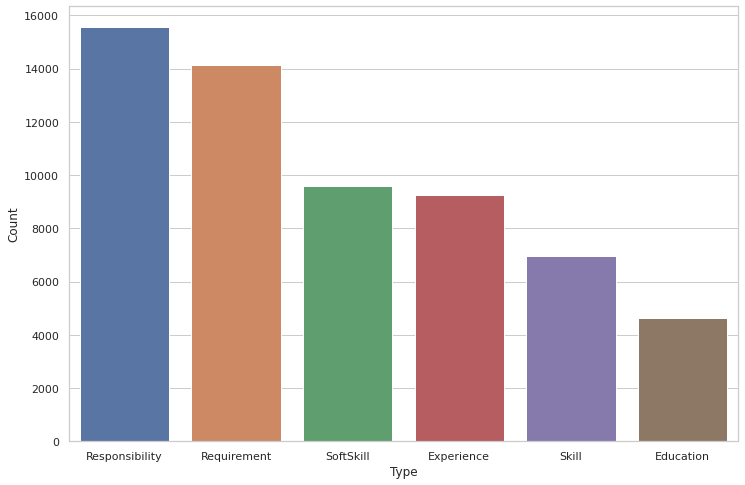

In [311]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
count = dataset["Type"].value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Type')
plt.ylabel('Count')

### Graphical Representation of data

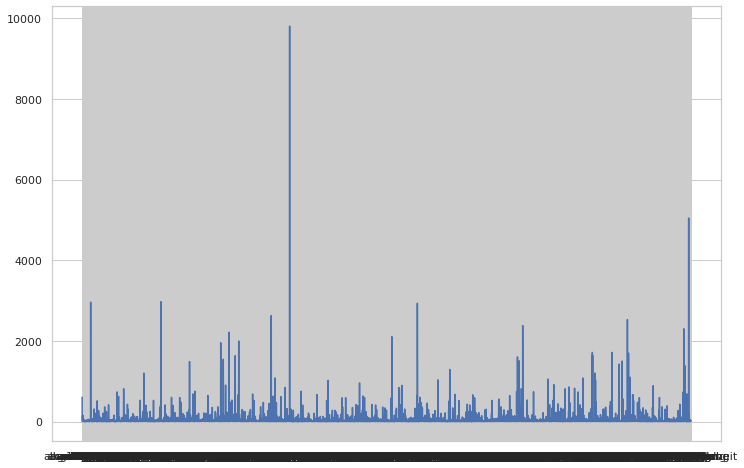

In [315]:
import matplotlib.pylab as plt
lists = sorted(word_counts.items())
x, y = zip(*lists)
plt.figure(figsize=(12,8))
plt.plot(x, y)
plt.show()

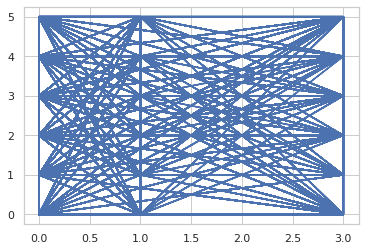

In [316]:
plt.figure(figsize=(12,8))
plt.plot(pred,test_labels)
plt.show()